#### 성능평가 지표 :
- 1. 정확도 : 실 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표 (예측데이터의 건수 / 전체 예측데이터 건수)
- 문제점 : 이진분류의 경우 모델의 성능을 왜곡할 수 있음.
- 왜 : 데이터의 불균형 때문에
- 해결책 : 정밀도(Precision) , 재현율(Recall) , 조화평균(F1-Score)

In [19]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer


from   IPython.display import Image


sklearn.__version__

'0.24.2'

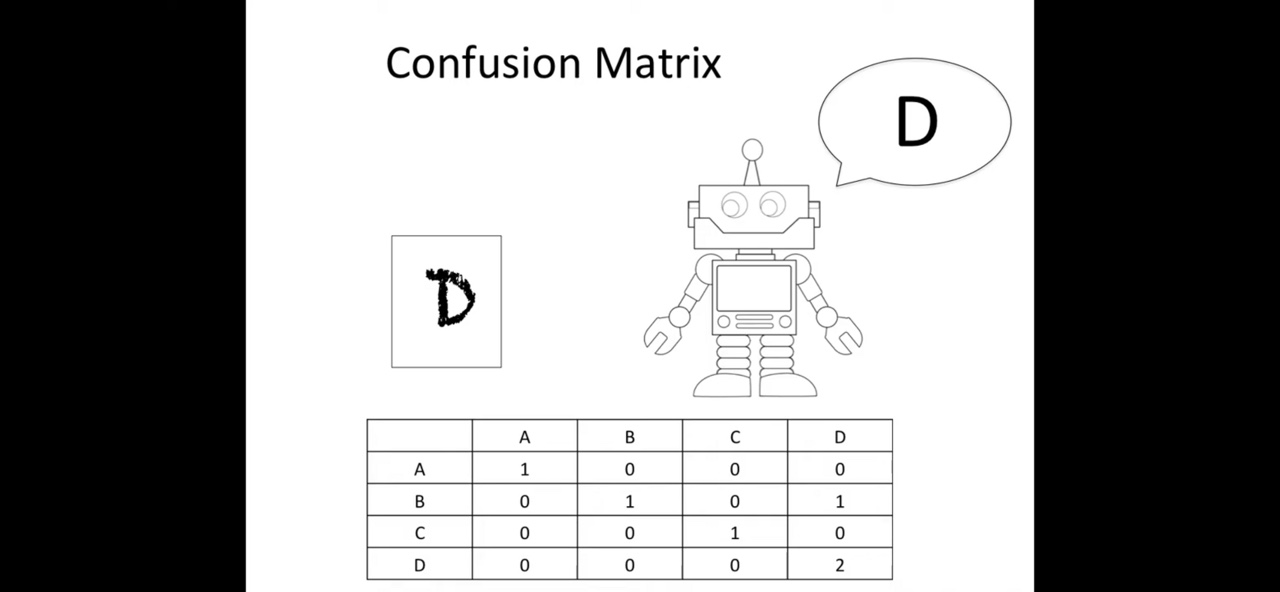

In [3]:
Image('c:/matrix_img/confusion_matrix01.png.jpg' , width = 700)

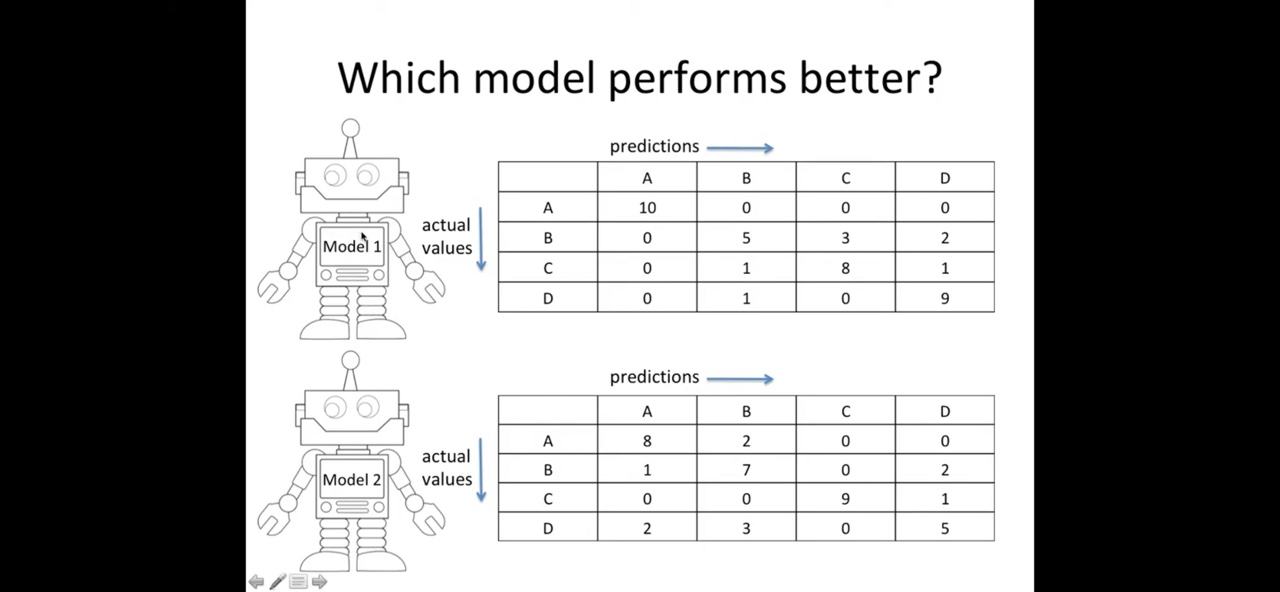

In [4]:
Image('c:/matrix_img/confusion_matrix02.png.jpg' , width = 700)

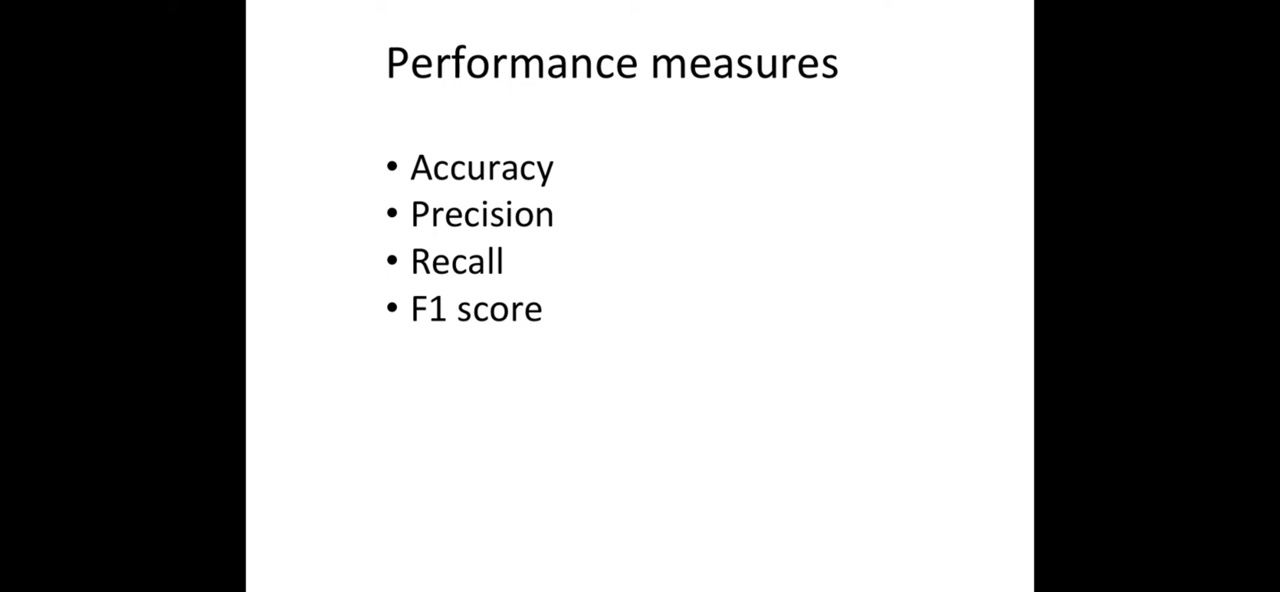

In [5]:
Image('c:/matrix_img/confusion_matrix03.png.jpg' , width = 700)

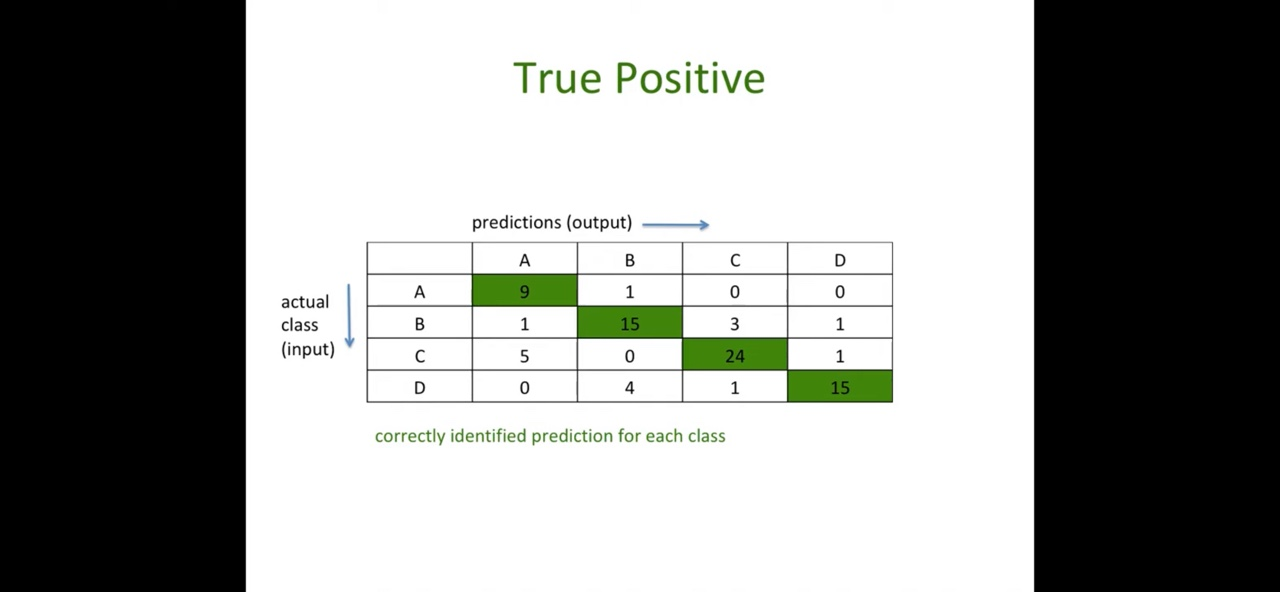

In [6]:
Image('c:/matrix_img/confusion_matrix04.png.jpg' , width = 700)

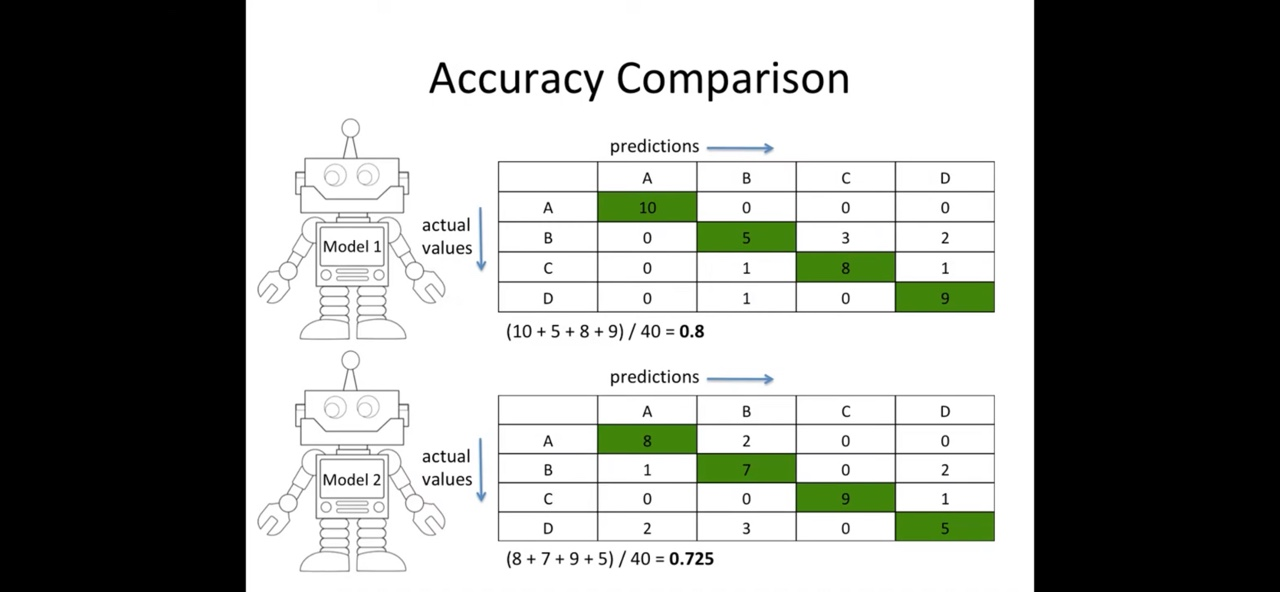

In [7]:
Image('c:/matrix_img/confusion_matrix11.png.jpg' , width = 700)

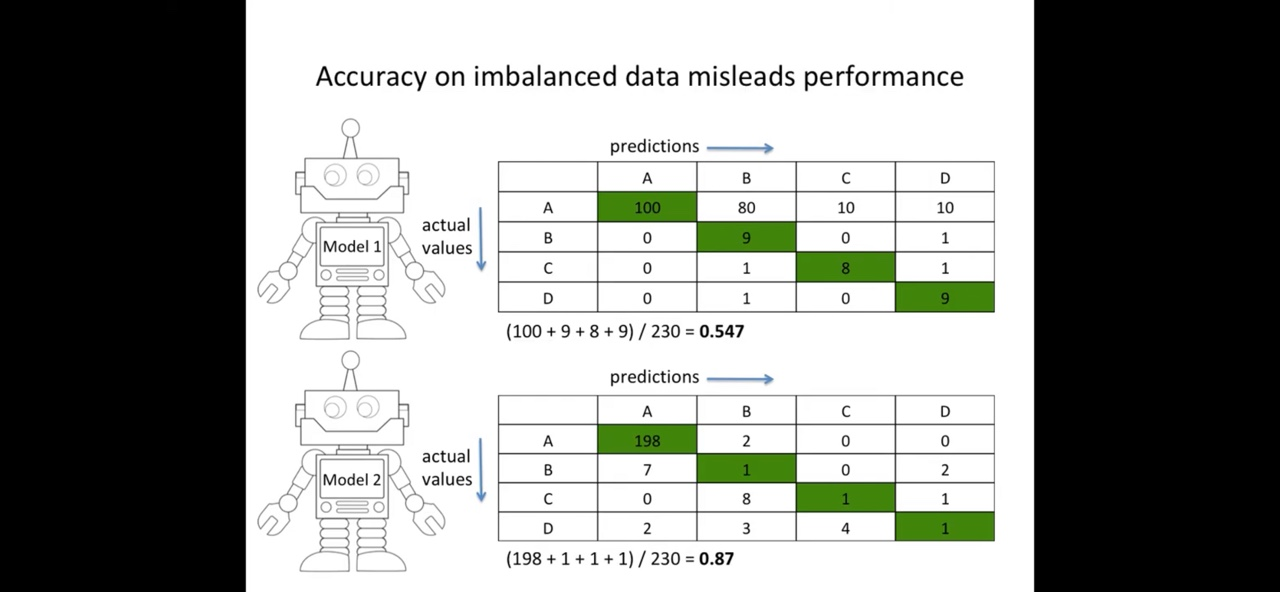

In [9]:
Image('c:/matrix_img/confusion_matrix13.png.jpg' , width = 700)

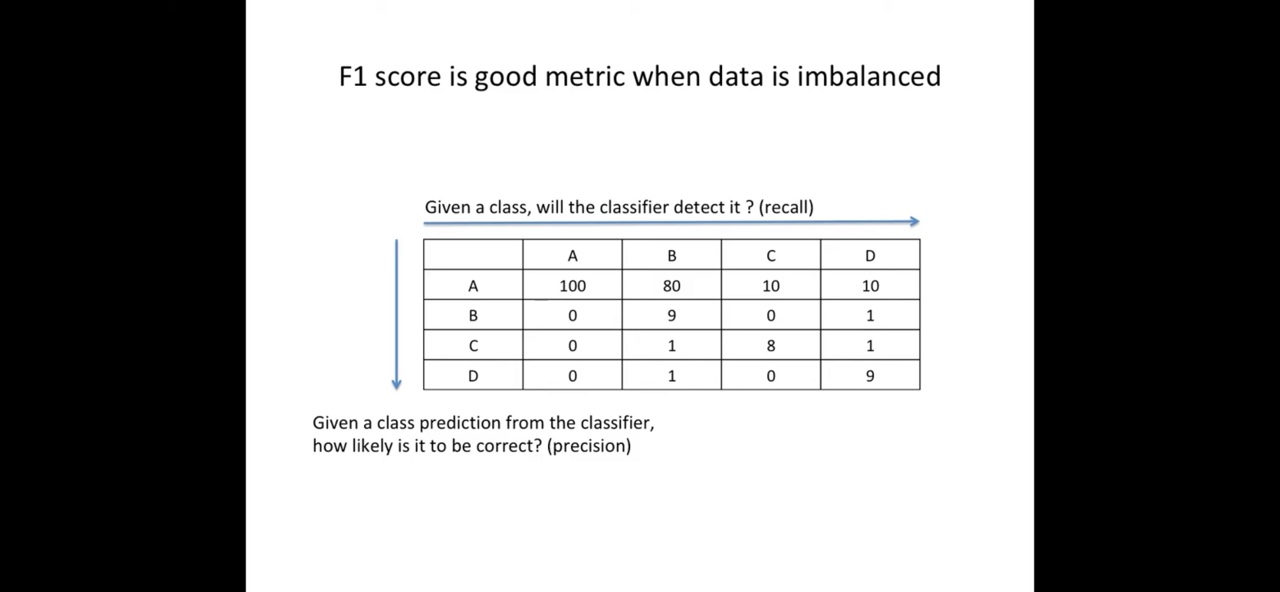

In [10]:
Image('c:/matrix_img/confusion_matrix14.png.jpg' , width = 700)

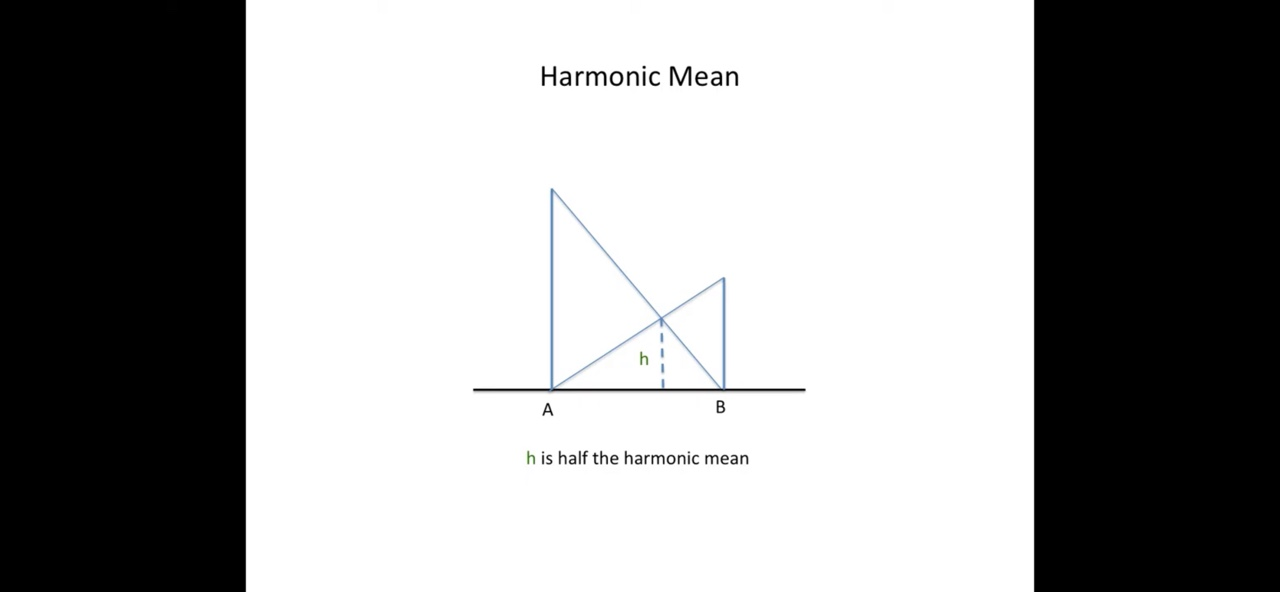

In [11]:
Image('c:/matrix_img/confusion_matrix16.png.jpg' , width = 700)

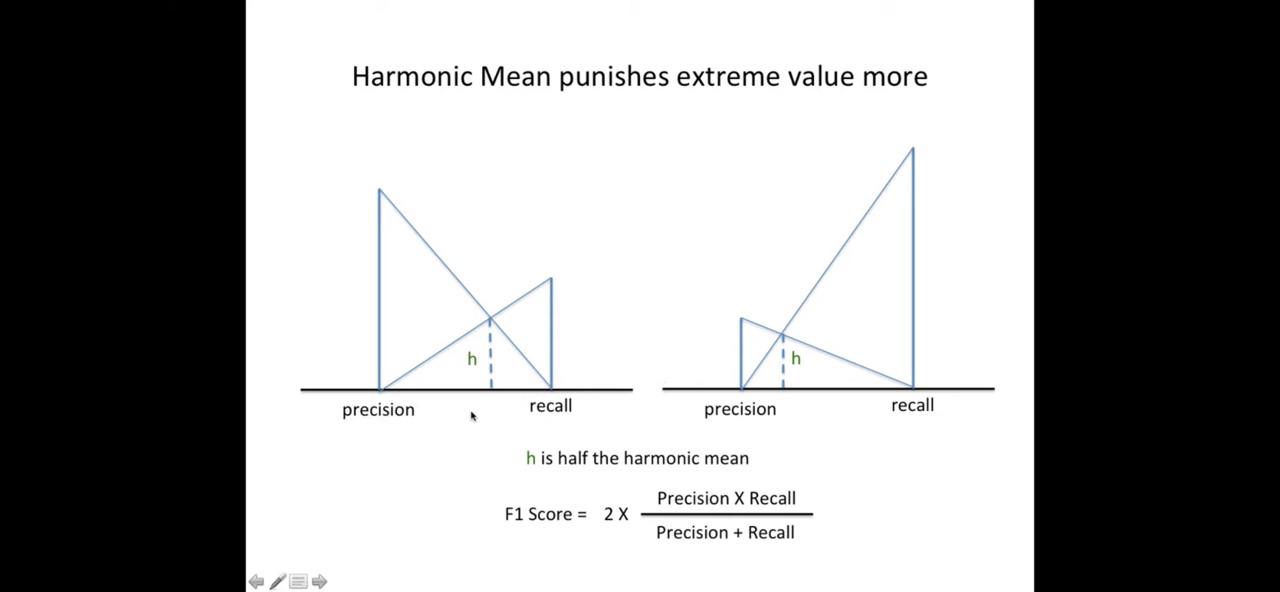

In [12]:
Image('c:/matrix_img/confusion_matrix17.png.jpg' , width = 700)

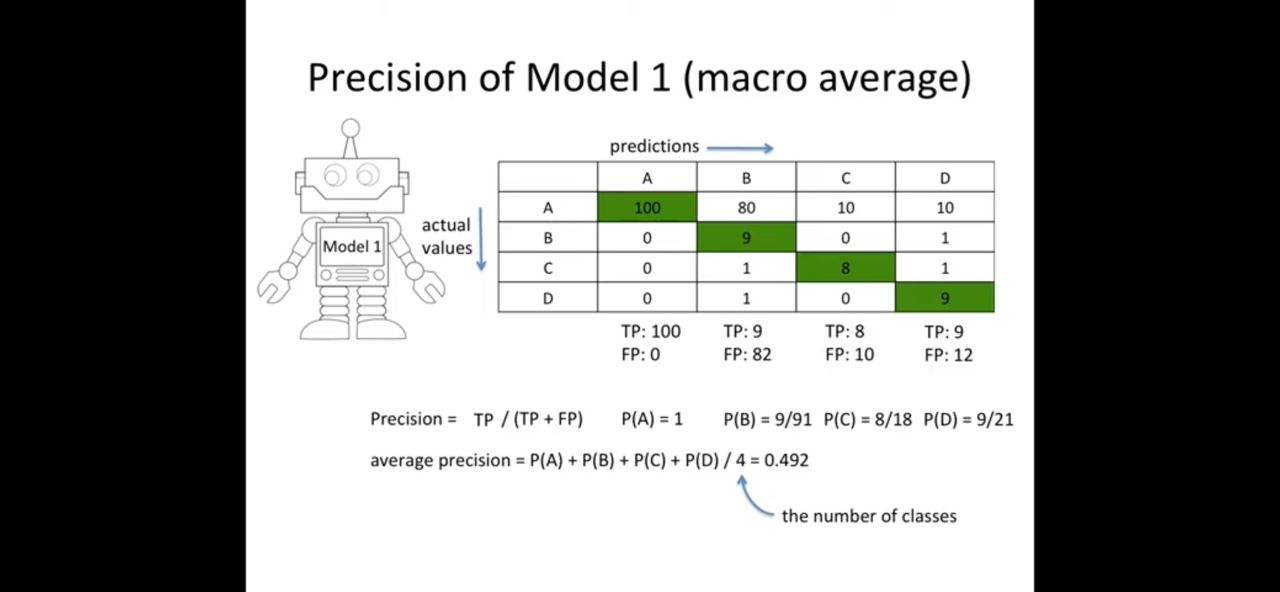

In [13]:
Image('c:/matrix_img/confusion_matrix18.png.jpg' , width = 700)

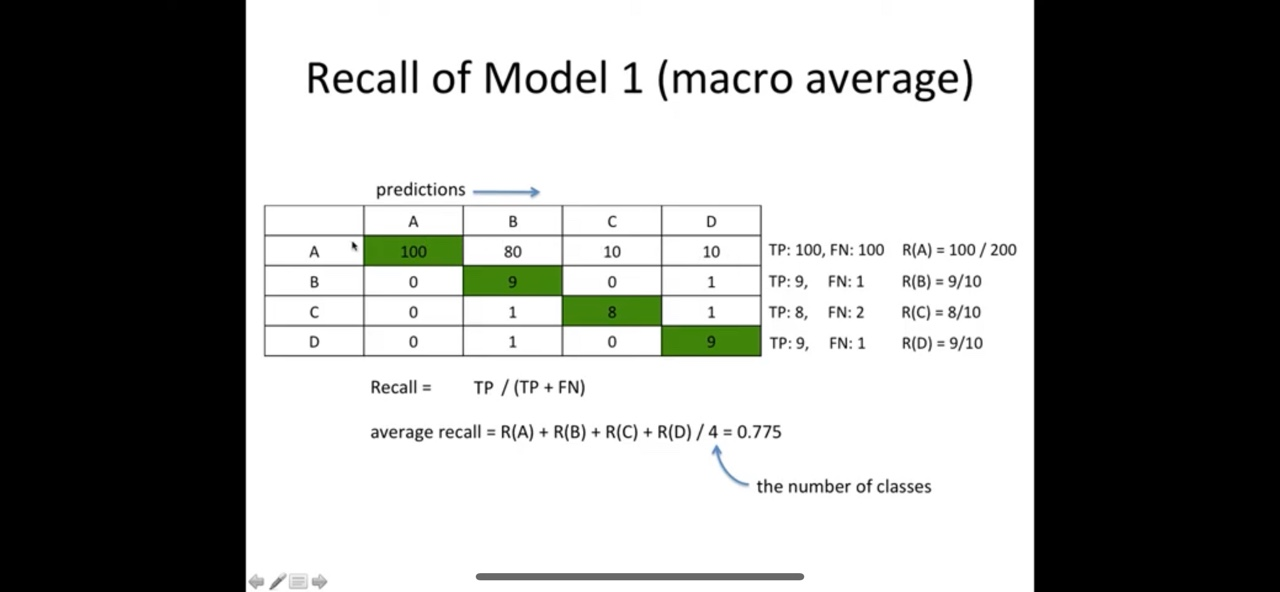

In [14]:
Image('c:/matrix_img/confusion_matrix19.png.jpg' , width = 700)

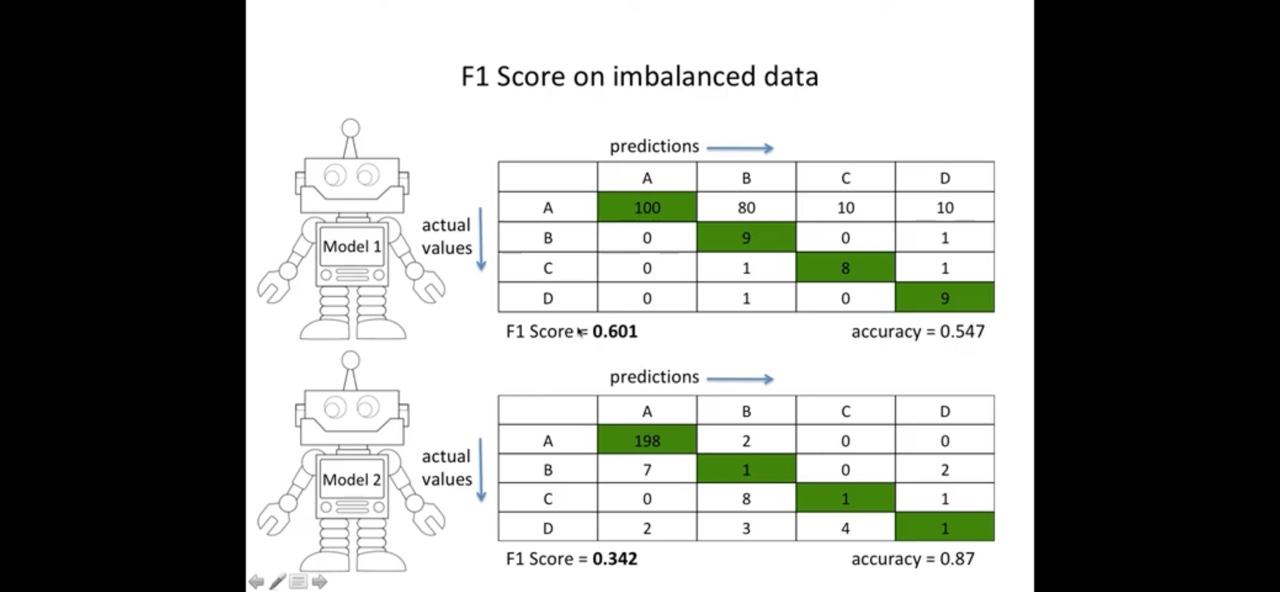

In [15]:
Image('c:/matrix_img/confusion_matrix21.png.jpg' , width = 700)

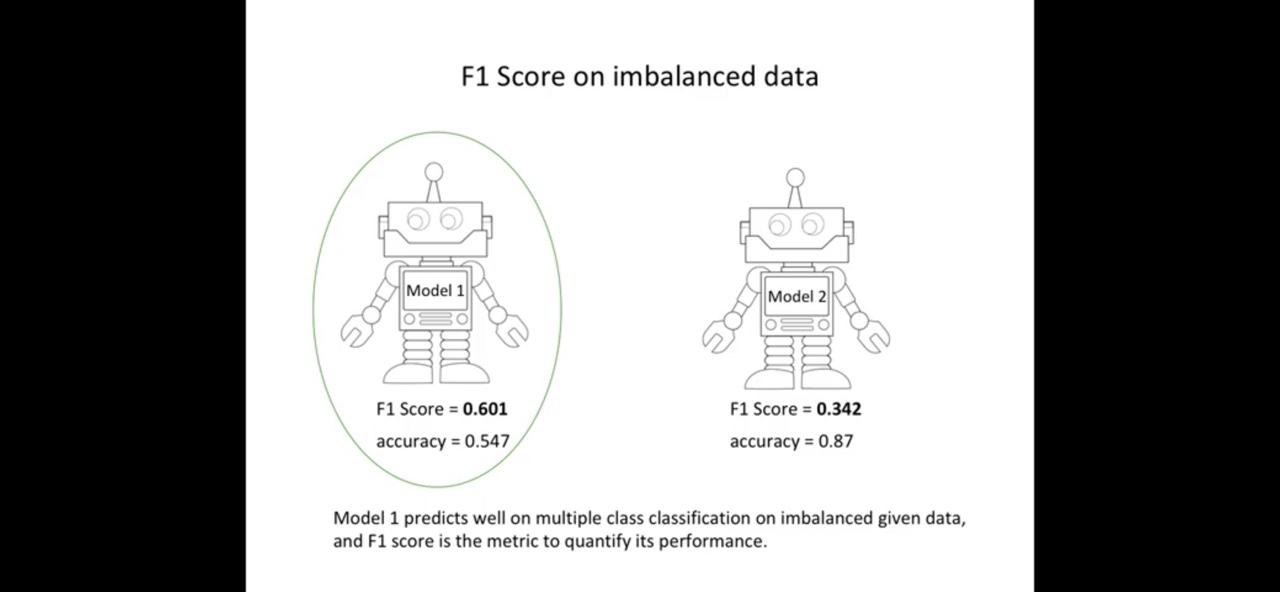

In [16]:
Image('c:/matrix_img/confusion_matrix22.png.jpg' , width = 700)

- 분류모델 성능 평가를 위한 이해

In [18]:
print('TP(target = 1 , predict = 1)')
print('TN(target = 0 , predict = 0)')
print('FN(target = 1 , predict = 0) -> Type I error')
print('FP(target = 0 , predict = 1) -> Type 2 error')

target     = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
prediction = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

tp = tn = fn = fp = 0 

for idx in range(len(target)) :
    if target[idx] == 1 and prediction[idx] == 1 :
        tp += 1 
    if target[idx] == 0 and prediction[idx] == 0 :
        tn += 1
    if target[idx] == 1 and prediction[idx] == 0 :
        fn += 1
    if target[idx] == 0 and prediction[idx] == 1 :
        fp += 1 
        
print()
print('TP(target = 1 , predict = 1) - ' , tp)
print('TN(target = 0 , predict = 0) - ' , tn)
print('FN(target = 1 , predict = 0) -> Type I error - ' , fn)
print('FP(target = 0 , predict = 1) -> Type 2 error - ' , fp)


TP(target = 1 , predict = 1)
TN(target = 0 , predict = 0)
FN(target = 1 , predict = 0) -> Type I error
FP(target = 0 , predict = 1) -> Type 2 error

TP(target = 1 , predict = 1) -  3
TN(target = 0 , predict = 0) -  0
FN(target = 1 , predict = 0) -> Type I error -  4
FP(target = 0 , predict = 1) -> Type 2 error -  3


In [24]:
print('confusion matrix \n' , confusion_matrix(target , prediction))
print()
print('accuracy \n' , accuracy_score(target , prediction))
print()
print('recall \n'   , recall_score(target , prediction))
print()
print('precision \n'   , precision_score(target , prediction))
print()
print('f1 score \n'   , f1_score(target , prediction))



confusion matrix 
 [[0 3]
 [4 3]]

accuracy 
 0.3

recall 
 0.42857142857142855

precision 
 0.5

f1 score 
 0.4615384615384615


In [27]:
'''
요구사항) 
제품을 생산하는 공장에서 품질 테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다

테스트 결과 양성 -> 불량품
            음성 -> 정상제품

TP : 실제 불량을 불량으로 예측
TN : 실제 정상을 정상으로 예측
FN : 실제 불량을 정상으로 예측
FP : 실제 정상을 불량으로 예측

                   불량예측           정상예측
불량품               TP                 FN
정상제품             FP                 TN

정밀도(Precision) : TP / ( TP + FP )
-> 예측을 Positive 로 한 대상 중에 예측과 실제값이 Positive 로 일치하는 데이터의 비율
재현율(Recall)    : TP / ( TP + FN ) 
-> 실제값이 Positive 인 대상 중에 예측과 실제값이 Positive 로 일치한 데이터의 비율

- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸매일
- 상대적으로 재현율이 더 중요한 지표인 경우 : 의학(암 진단) , 금융(사기 판별)
'''        


'\n요구사항) \n제품을 생산하는 공장에서 품질 테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다\n\n테스트 결과 양성 -> 불량품\n            음성 -> 정상제품\n\nTP : 실제 불량을 불량으로 예측\nTN : 실제 정상을 정상으로 예측\nFN : 실제 불량을 정상으로 예측\nFP : 실제 정상을 불량으로 예측\n\n                   불량예측           정상예측\n불량품               TP                 FN\n정상제품             FP                 TN\n\n정밀도(Precision) : TP / ( TP + FP )\n-> 예측을 Positive 로 한 대상 중에 예측과 실제값이 Positive 로 일치하는 데이터의 비율\n재현율(Recall)    : TP / ( TP + FN ) \n-> 실제값이 Positive 인 대상 중에 예측과 실제값이 Positive 로 일치한 데이터의 비율\n\n- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸매일\n- 상대적으로 재현율이 더 중요한 지표인 경우 : 의학(암 진단) , 금융(사기 판별)\n'